<a href="https://colab.research.google.com/github/KeitaW/Colab-Notebooks/blob/master/210425beer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www3.cuc.ac.jp/~nagaoka/2012/ouyou/08/beer/index.html より

In [6]:
import pandas as pd
import seaborn as sns

In [7]:
 beer = pd.DataFrame({
    "date": ["2009/01", "2009/02", "2009/03", "2009/04", "2009/05", "2009/06", "2009/07", "2009/08", "2009/09", "2009/10", "2009/11", "2009/12", "2010/01", "2010/02", "2010/03", "2010/04", "2010/05", "2010/06", "2010/07", "2010/08", "2010/09", "2010/10", "2010/11", "2010/12"],
    "temperature": [6.8, 7.8, 10.0, 15.7, 20.1, 22.5, 26.3, 26.6, 23.0, 19.0, 13.5, 9.0, 7.0, 6.5, 9.1, 12.4, 19.0, 23.6, 28.0, 29.6, 25.1, 18.9, 13.5, 9.9],
    "sales volume": [5107, 7267, 8706, 10170, 9760, 12001, 12980, 11939, 9175, 9177, 9066, 15626, 4693, 6426, 8661, 9769, 8655, 12370, 12678, 11740, 9160, 8370, 9494, 14638]
})
beer

,date,temperature,sales volume
0,2009/01,6.8,5107
1,2009/02,7.8,7267
2,2009/03,10.0,8706
3,2009/04,15.7,10170
4,2009/05,20.1,9760
5,2009/06,22.5,12001
6,2009/07,26.3,12980
7,2009/08,26.6,11939
8,2009/09,23.0,9175
9,2009/10,19.0,9177


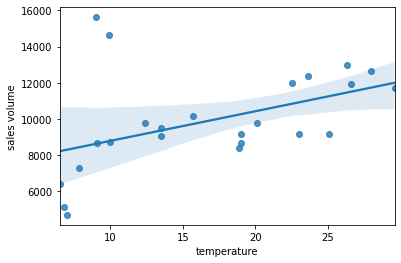

In [8]:
sns.regplot(x="temperature", y="sales volume", data=beer)